# Lab02 : Réseaux de neurones (Auto-encodeurs et CNN)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import colors
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Sequential, Model

2023-04-26 09:06:01.168500: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-26 09:06:01.169728: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-26 09:06:01.192980: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-26 09:06:01.193697: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 09:06:01.584682: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [3]:
import os
import re
from pathlib import Path
import matplotlib.image as mpimg

## I. Pré-traitement

In [4]:
# Lorsqu'on lit l'image PNG avec 3 canaux, 
# les parties transparentes sont transformées en noir 
# Or, normalement elle doivent être en blanc
# Donc, j'ai supposé que la partie transparente est encodée sous forme (0, 0, 0, 0)
# Dans ce cas, on la transforme à (255, 255, 255)
def rgb_vers_rgba(img):
    h, w, c = img.shape
    if c != 4:
        return img
    
    resh_img = img.reshape([-1, c])
    new_img = []
    
    for i in range(len(resh_img)):
        l = resh_img[i, :]
        if l[3] == 0:
            new_img.append([255, 255, 255])
        else:
            new_img.append(l[:-1])
    return np.array(new_img).reshape([h, w, 3])
    
rgb_vers_rgba(np.array([
    [[255, 200, 100, 255], [255, 200, 100, 255], [255, 200, 100, 0]],
    [[255, 200, 100, 255], [0, 0, 0, 0], [255, 200, 100, 200]]
]))

array([[[255, 200, 100],
        [255, 200, 100],
        [255, 255, 255]],

       [[255, 200, 100],
        [255, 255, 255],
        [255, 200, 100]]])

In [5]:
DATASET_LOC = 'pokemon/'

types_df = pd.read_csv(DATASET_LOC + 'pokemon.csv')
types_df = types_df.drop(['Type2'], axis=1)

def generer_dataset(ext='*.png'):
    d = DATASET_LOC + 'images/images'
    path = Path(d)
    fichiers = list(path.glob(ext))
    noms = [os.path.split(fichier)[1] for fichier in fichiers ]
    image_df = pd.concat([pd.Series(noms, name='Name'), pd.Series(fichiers, name='path').astype(str)], axis=1)
    image_df['Name'] = image_df['Name'].apply(lambda x: re.sub(r'\.\w+$', '', x))
    
    df = image_df.merge(types_df, on='Name')
    
    imgs = []
    for index in range(df.shape[0]):
        img = tf.io.decode_image(tf.io.read_file(df['path'][index]), channels=0)
        img = rgb_vers_rgba(img.numpy())
        imgs.append(img)
#         imgs.append(mpimg.imread(df['path'][index]))
    
    return np.array(imgs), df['Type1'].values

def afficher_images(imgs, n):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(imgs[i]) # recontruct the matrix
        plt.gray()
#         plt.title("N: " + str(y_train[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
print('Fonction definie')

Fonction definie


2023-04-26 09:06:02.083024: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-26 09:06:02.084086: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


(721, 120, 120, 3)


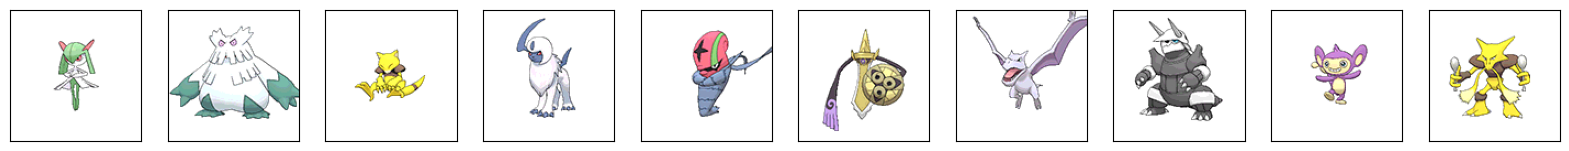

In [6]:
# dataset d'entraînement
X_train, Y_train = generer_dataset()

X_train = X_train / 255

# 721 images de 120X120 pixels chaque pixel est encodé sur 3 canaux 
print(X_train.shape)

afficher_images(X_train, 10)

(88, 120, 120, 3)


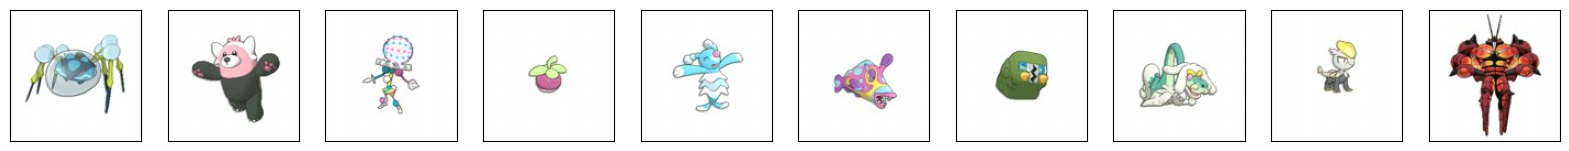

In [7]:
# dataset de test
X_test, Y_test = generer_dataset('*.jpg')

X_test = X_test / 255

# 721 images de 120X120 pixels chaque pixel est encodé sur 4 canaux 
print(X_test.shape)

afficher_images(X_test, 10)

In [8]:
from sklearn.preprocessing import LabelEncoder

pokemon_type_enc = LabelEncoder()

Y_train = pokemon_type_enc.fit_transform(Y_train)
Y_test = pokemon_type_enc.transform(Y_test)

# Le dataset de test n'est pas vraiment représentatif : les classes 7 et 11 
# ne figurent pas dans le test
np.unique(Y_train), np.unique(Y_test)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 12, 13, 14, 15, 16, 17]))

## II. Classement CNN

## III. Auto-encodeur de clustering

## IV. Auto-encodeur de clustering pour classement

## V. Génération des images